# Task 2 of Data Science and Business Analytics Internship


## Author : Bhushan Dhamankar

### Predicting Optimum no. of Clusters and represent it Visually

In [51]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings as wg
wg.filterwarnings('ignore')

In [52]:
# Reading Dataset
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# Dropping 'Species' as this is Unsupervised Problem
data.drop(['Id', 'Species'],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
# Shape of Dataset
data.shape

(150, 4)

In [55]:
# Checking for Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


OBSERVATION : No Null Values

In [56]:
# Quick Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [57]:
# List of Features
features=list(data.columns)
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

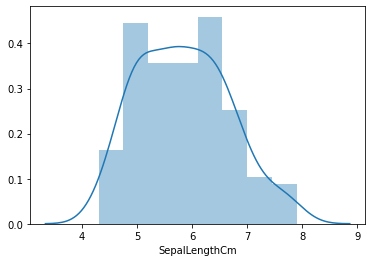

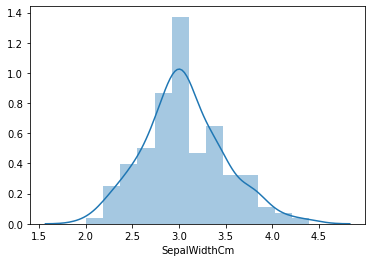

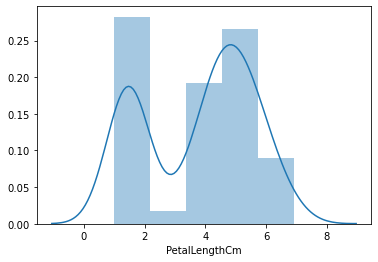

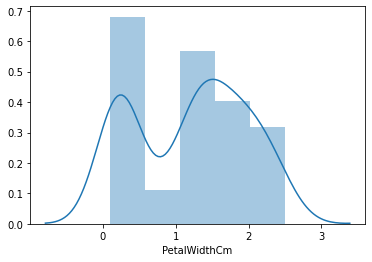

In [58]:
# Distribution of Continuous Numerical Features
for feature in features:
    sns.distplot(data[feature])
    plt.show()

OBSERVATION : No Scaling is required as all four Features has same unit 'cm'

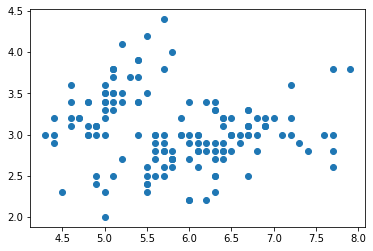

In [59]:
plt.scatter(data=data,x='SepalLengthCm',y='SepalWidthCm')

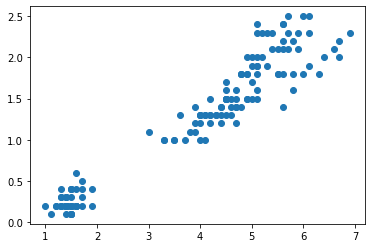

In [60]:
plt.scatter(data=data,x='PetalLengthCm',y='PetalWidthCm')

In [61]:
# Finding No. of Clusters by Elbow Method
wcss=[]
clusters_range=range(1,10)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    wcss.append(km.inertia_)

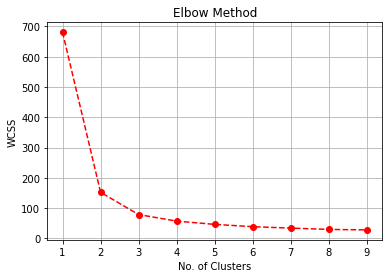

In [62]:
# Plotting Elbow Points
plt.plot(clusters_range,wcss,'ro--')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

OBSERVATION : We can see the Elbow point is 3 i.e. no. of Clusters

In [63]:
# Applying KMeans Clustering
km = KMeans(n_clusters = 3, random_state=0)
pred = km.fit_predict(data)

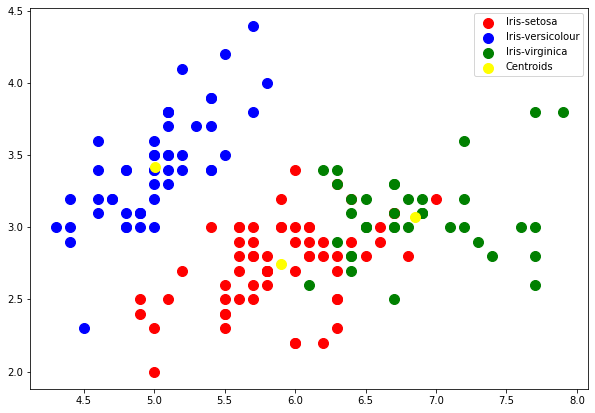

In [64]:
# Visualising the clusters on the basis of 'SepalLengthCm' and 'SepalWidthCm'
plt.figure(figsize=[10,7])
x = data.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

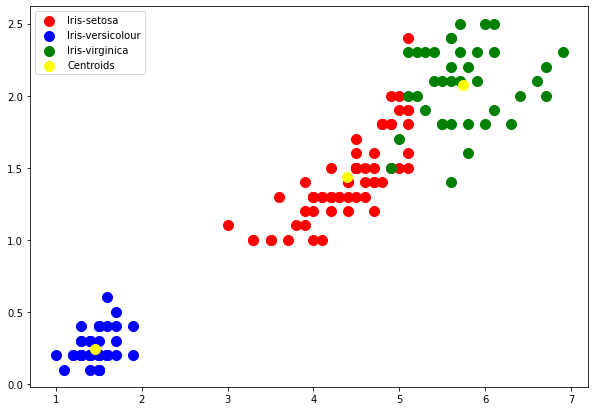

In [66]:
# Visualising the clusters on the basis of 'PetalLengthCm' and 'PetalWidthCm'
plt.figure(figsize=[10,7])
x = data.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[pred == 0, 2], x[pred == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 2], x[pred == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 2], x[pred == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()